<a href="https://colab.research.google.com/github/Janies-Garcia-Velasco/Optimizacion-no-lineal/blob/main/Copia_de_Tarea_KKT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para  resolver el  problema de optiizacion utilizando KKT, debemos encontrar los multiplicadores dee lagrange que satisfacen las condiciones necesarias

* Planteamiento del problema

minimizar la funcion objetivo:

$f(x_1,x_2)=2x_1+3x_2-4$

sujeto a: $g(x_1,x_2)=x_1x_2-6=0$

**Lagrangiana**
La funcion lagrangiana($\mathcal{L}$) se deefine como:
$\mathcal{L}(x_1,x_2,λ)=f(x_1,x_2)+λg(x_1,x_2)$

sustituyendo(f) y (g):

$\mathcal{L}(x_1,x_2,\lambda)=2x_1+3x_2-4+\lambda(x_1x_2-6)$

Condiciones de KKT

1.$\frac{\partial \mathcal{L}}{\partial x_1}=0$

2.$\frac{\partial \mathcal{L}}{\partial x_2}=0$

3.$\frac{\partial \mathcal{L}}{\partial λ }=0$

resolviendo:

1.$\frac{\partial \mathcal{L}}{\partial x_1}=2+ λ x_2=0$

2.$\frac{\partial \mathcal{L}}{\partial x_2}=3+ λ x_1=0$

3.$\frac{\partial \mathcal{L}}{\partial \lambda }=x_1x_2-6=0$

obteniendo asi el sig sistema dee ecuaciones

1.$(2+\lambda x_2=0)$

2.$(3+\lambda x_1=0)$

3.$(x_1 x_2-6=0)$

resolviendo

de 1: $\lambda x_2=-2$

de 2: $\lambda x_1=-3$

igualando las expresiones para $\lambda$:

$-\frac{2}{x_2}=-\frac{3}{x_1}$

$2x_1=3x_2$

sustituyendo $x_1$ en la restriccion

$((\frac{3}{2}x_2)x_2=6)$

$x_2ˆ2=\frac{6*2}{3}$

$x_2=±2$

para $(x_2=2)$

$x_1=\frac{3}{2}*2=3 $

para $(x_2=-2)=-2$

soluciones
 las  soluciones son $(x_1,x_2)=(3,2) y (x_1,x-2)=(-3,-2)$

 *verificamos la funcion objetivo*

 calculamos la funcion objetivo para ambas soluciones:

para (3,2):

 $f(3,2)=2(3)+3(2)-4= 8$

para (-3,-2):

 $f(-3,-2)=2(-3)+3(-2)-4= -16$

 **Solucion optima**

 la solucion que minimiz la funcion objetivo es $(x_1,x_2)=(-3,-2)$ con un valor dee la funcion objetivo de $-16$

 por lo que el punto optimo lo tenemos en: $x_1=-3, x_2=-2$

 y el valor minimo de la funcion objetivo es $-16$

* para graficacion, codigo

<ipython-input-1-69afa535d8ae>:9: RuntimeWarning: overflow encountered in scalar multiply
  return x[0] * x[1] - 6
<ipython-input-1-69afa535d8ae>:24: RuntimeWarning: invalid value encountered in subtract
  x_nuevo = x - alfa * grad(x, mu)


mu = 10
x óptimo: [2.97459108 1.98317936]
Valor de la función en x óptimo: 7.898720255170513
Valor de la restricción en x óptimo: -0.10085235066185483

mu = 100
x óptimo: [nan nan]
Valor de la función en x óptimo: nan
Valor de la restricción en x óptimo: nan



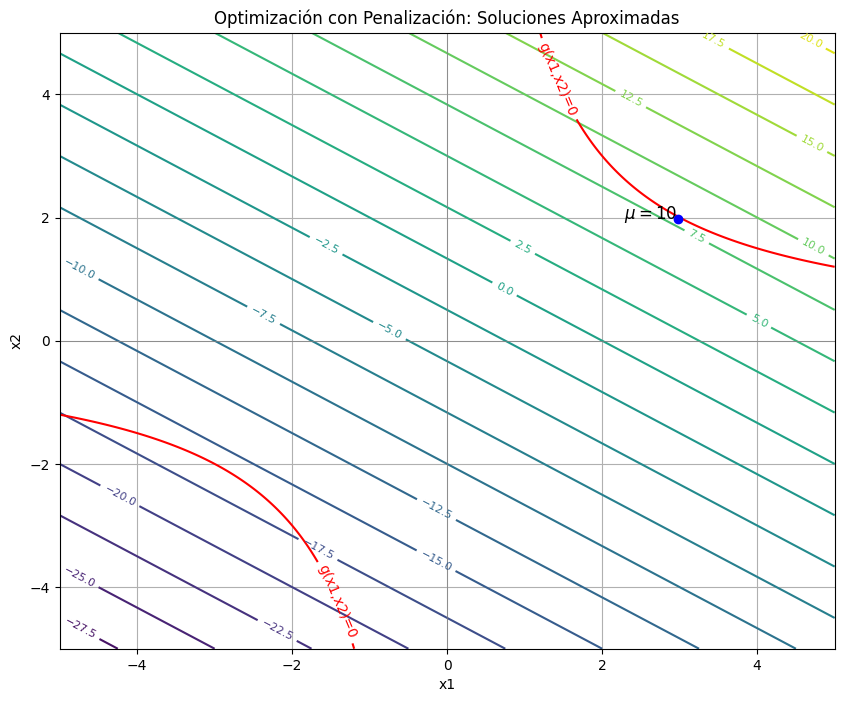

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las funciones
def f(x):
    return 2 * x[0] + 3 * x[1] - 4

def g(x):
    return x[0] * x[1] - 6

def P(x, mu):
    return f(x) + (mu / 2) * g(x) ** 2

# Gradiente de la función penalizada
def grad_P(x, mu):
    grad_f = np.array([2, 3])
    grad_g = np.array([x[1], x[0]])
    return grad_f + mu * g(x) * grad_g

# Método de gradiente descendente
def descenso_gradiente(grad, x0, mu, alfa=0.01, tol=1e-6, max_iter=10000):
    x = x0
    for i in range(max_iter):
        x_nuevo = x - alfa * grad(x, mu)
        if np.linalg.norm(x_nuevo - x) < tol:
            break
        x = x_nuevo
    return x

# Valores iniciales y parámetros
x0 = np.array([1.0, 1.0])  # Punto inicial
valores_mu = [10, 100]  # Valores de penalización
alfa = 0.01  # Tasa de aprendizaje

# Ejecutar el método de gradiente descendente para diferentes valores de mu
resultados = []
for mu in valores_mu:
    x_opt = descenso_gradiente(grad_P, x0, mu, alfa)
    resultados.append((mu, x_opt, f(x_opt), g(x_opt)))

# Mostrar los resultados
for resultado in resultados:
    mu, x_opt, f_opt, g_val = resultado
    print(f"mu = {mu}")
    print(f"x óptimo: {x_opt}")
    print(f"Valor de la función en x óptimo: {f_opt}")
    print(f"Valor de la restricción en x óptimo: {g_val}")
    print()

# Graficar los resultados
x1 = np.linspace(-5, 5, 400)
x2 = np.linspace(-5, 5, 400)
X1, X2 = np.meshgrid(x1, x2)
F = f([X1, X2])
G = g([X1, X2])

plt.figure(figsize=(10, 8))

# Contornos de la función objetivo
contour_f = plt.contour(X1, X2, F, levels=20, cmap='viridis')
plt.clabel(contour_f, inline=True, fontsize=8)

# Contorno de la restricción
contour_g = plt.contour(X1, X2, G, levels=[0], colors='red')
plt.clabel(contour_g, inline=True, fontsize=10, fmt='g(x1,x2)=0')

# Soluciones aproximadas
colores = ['blue', 'green']
for i, resultado in enumerate(resultados):
    mu, x_opt, _, _ = resultado
    plt.scatter(x_opt[0], x_opt[1], color=colores[i], zorder=5)
    plt.text(x_opt[0], x_opt[1], f'$\mu={mu}$', fontsize=12, ha='right')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Optimización con Penalización: Soluciones Aproximadas')
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.grid(True)
plt.show()


* problema 2

de forma analitica

Minimizar:
$$f(x_1,x_2)=x_1^2=x_2^2$$


Sujeto a:
$$g_1(x_1,x_2)=4-x_1-x_2^2\leq 0$$
$$g_2(x_1,x_2)=3x_2-x_1\leq 0$$
$$g_3(x_1,x_2)=-3x_2-x_1\leq 0$$

Método KKT
Definimos la función Lagrangiana:

$L(x_1,x_2,\lambda_1,\lambda_2,\lambda_3)=f(x_1,x_2)=\lambda_1g_1(x_1,x_2)+\lambda_2g_2(x_1,x_2)+\lambda_3g_3(x_1,x_2)$

Donde $\lambda_1,\lambda_2\lambda_3\geq 0$ son los multiplicadores de lagrange

La funcion lagrangiana es

$L(x_1,x_2,\lambda_1,\lambda_2,\lambda_3)=x_1^2+x_2^2+\lambda_1(4-x_1-x_2^2)=\lambda_2(3x_2-x_1)+\lambda_3(-3x_2-x_1)$

Las condiciones de KKT son:

1. $\nabla L=0$
2. $\lambda_1g_1(x_1,x_2)=0$
3. $\lambda_2g_2(x_1,x_2)=0$
4. $\lambda_3g_3(x_1,x_2)=0$
5. $g_1(x_1,x_2)$
6. $g_2(x_1,x_2)$
7. $g_3(x_1,x_2)$
8. $\lambda_1,\lambda_2,\lambda_3\leq 0$

Derivadas parciales

1. $\frac{\partial L}{\partial x_1}=2x_1-\lambda_1-\lambda_2-\lambda_3=0$

2. $\frac{\partial L}{\partial x_2}=2x_2-2\lambda_1 x_2+3\lambda_2-3\lambda_3=0$

3. $\frac{\partial L}{\partial \lambda_1}=4-x_1-x_2^2\leq 0$

4. $\frac{\partial L}{\partial \lambda_2}=-3x_2-x_1\leq 0$

Resolviendo el sistema de ecuaciones

Vamos a considerar varios casos posibles para los multiplicadores de Lagrange y las restricciones.

Caso 1: $\lambda_1>0,\lambda_2=0,\lambda_3=0$

Esto implica que $g_1(x_1,x_2)=0$, entonces:

$4-x_1-x_2^2=0$

$x_1=4-x_2^2$

Sustituyendo en las derivadas parciales:

$2(4-x_2^2)-\lambda_1=0$

$\lambda_1=8-2x_2^2$

$2x_2-2\lambda x_2=0$

$2x_2(1-(8-2x_2^2))=0$

$2x_2(-7+2x_2^2)=0$

$x_2(2x_2^2-7)=0$

$x_2=0$ o $2x_2^2=7$

Si $x_2=0$:

$x_1=4-0=4$

$g_2(x_1,x_2)=3(0)-4\leq 0$

$g_3(x_1,x_2)=-3(0)-4\leq 0$

Ambas restricciones se cumplen.

Si $2x_2^2=7$:

$x_2=\pm \sqrt\frac{7}{2}$

$x_1=4-\big(\sqrt\frac{7}{2}\big)^2=4-\frac{7}{2}=\frac{1}{2}$

$g_2(x_1,x_2)=3\big(\pm\sqrt\frac{7}{2}\big)-\frac{1}{2}$

$g_3(x_1,x_2)=-3\big(\pm\sqrt\frac{7}{2}\big)-\frac{1}{2}$

Para estos valores, es posible que las restricciones no se cumplan debido a los términos positivos y negativos en $\sqrt\frac{7}{2}$.

Caso 2: $\lambda_1=0,\lambda_2>0, \lambda=0$

Esto implica que $g_2(x_1,x_2)=0$, entonces:

$3x_2-x_1=0$

$x_1=3x_2$

Sustituyendo en las derivadas parciales:

$2(3x_2)-\lambda_2=0$

$\lambda_2=6x_2$

$2x_2+3\lambda_2=0$

$2x_2+3(6x_2)=0$

$20x_2=0$

$x_2=0$

$x_1=3(0)=0$

Para estos valores:

$g_1(x_1,x_2)=4-0-0^2=4\leq 0$

$g_3(x_1,x_2)=-3(0)-0=0$

Caso 3: $\lambda_1=0, \lambda_2=0,\lambda_3>0$

Esto implica que $g_3(x_1,x_2)=0$, entonces:

$-3x_2-x_1=0$

$x_1=-3x_2$

Sustituyendo en las derivadas parciales:

$2(-3x_2)-\lambda_3=0$

$\lambda_3=-6x_2$

$2x_2-3\lambda_3=0$

$2x_2-3(6x_2)=0$

$20x_2=0$

$x_2=0$

$x_1=-3(0)=0$

Para estos valores:

$g_1(x_1,x_2)=4-0-0^2\leq 0$

$g_2(x_1,x_2)=3(0)-0=0$

Conclusión:
El único punto que satisface todas las condiciones de KKT y cumple las restricciones es $(x_1,x_2)=(0,0)$

Por lo tanto, el mínimo de la función objetivo sujeta a las restricciones es:

$f(0,0)=0^2+0^2=0$

* para grafica y codigo

mu = 10
x óptimo: [3.3333251 0.       ]
Valor de la función en x óptimo: 11.111056215599495
Valor de g1 en x óptimo: 0.6666749010035797
Valor de g2 en x óptimo: -3.3333250989964203
Valor de g3 en x óptimo: -3.3333250989964203

mu = 100
x óptimo: [3.921568 0.      ]
Valor de la función en x óptimo: 15.378695578624
Valor de g1 en x óptimo: 0.07843199999999984
Valor de g2 en x óptimo: -3.921568
Valor de g3 en x óptimo: -3.921568



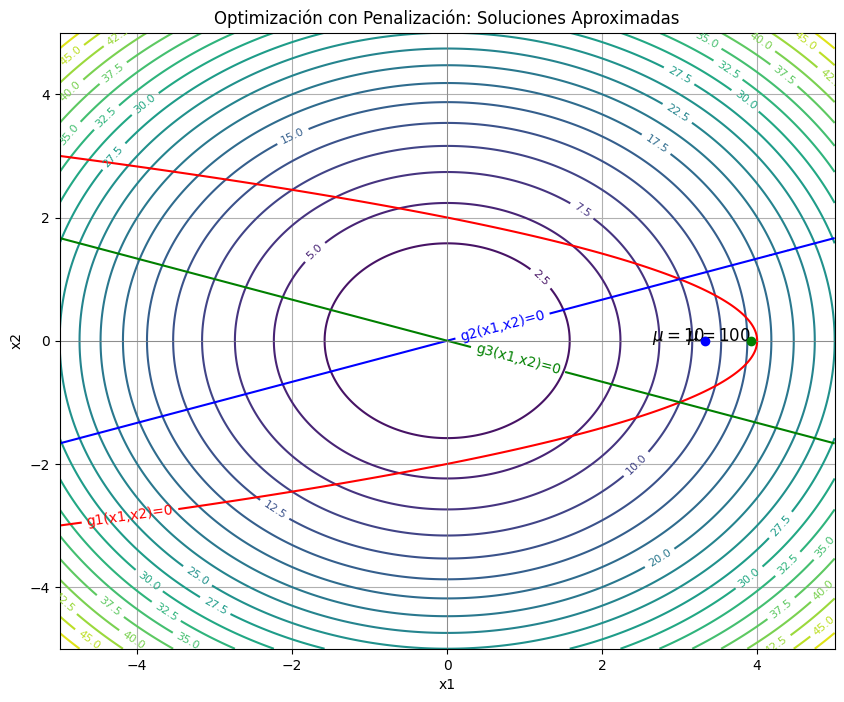

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las funciones
def f(x):
    return x[0]**2 + x[1]**2

def g1(x):
    return 4 - x[0] - x[1]**2

def g2(x):
    return 3*x[1] - x[0]

def g3(x):
    return -3*x[1] - x[0]

def P(x, mu):
    return f(x) + (mu / 2) * (max(0, g1(x))**2 + max(0, g2(x))**2 + max(0, g3(x))**2)

# Gradiente de la función penalizada
def grad_P(x, mu):
    grad_f = np.array([2*x[0], 2*x[1]])
    grad_g1 = np.array([-1, -2*x[1]]) if g1(x) > 0 else np.array([0, 0])
    grad_g2 = np.array([-1, 3]) if g2(x) > 0 else np.array([0, 0])
    grad_g3 = np.array([-1, -3]) if g3(x) > 0 else np.array([0, 0])
    return grad_f + mu * (g1(x) * grad_g1 + g2(x) * grad_g2 + g3(x) * grad_g3)

# Método de gradiente descendente
def descenso_gradiente(grad, x0, mu, alfa=0.01, tol=1e-6, max_iter=10000):
    x = x0
    for i in range(max_iter):
        x_nuevo = x - alfa * grad(x, mu)
        if np.linalg.norm(x_nuevo - x) < tol:
            break
        x = x_nuevo
    return x

# Valores iniciales y parámetros
x0 = np.array([0.0, 0.0])  # Punto inicial
valores_mu = [10, 100]  # Valores de penalización
alfa = 0.01  # Tasa de aprendizaje

# Ejecutar el método de gradiente descendente para diferentes valores de mu
resultados = []
for mu in valores_mu:
    x_opt = descenso_gradiente(grad_P, x0, mu, alfa)
    resultados.append((mu, x_opt, f(x_opt), g1(x_opt), g2(x_opt), g3(x_opt)))

# Mostrar los resultados
for resultado in resultados:
    mu, x_opt, f_opt, g1_val, g2_val, g3_val = resultado
    print(f"mu = {mu}")
    print(f"x óptimo: {x_opt}")
    print(f"Valor de la función en x óptimo: {f_opt}")
    print(f"Valor de g1 en x óptimo: {g1_val}")
    print(f"Valor de g2 en x óptimo: {g2_val}")
    print(f"Valor de g3 en x óptimo: {g3_val}")
    print()

# Graficar los resultados
x1 = np.linspace(-5, 5, 400)
x2 = np.linspace(-5, 5, 400)
X1, X2 = np.meshgrid(x1, x2)
F = f([X1, X2])
G1 = g1([X1, X2])
G2 = g2([X1, X2])
G3 = g3([X1, X2])

plt.figure(figsize=(10, 8))

# Contornos de la función objetivo
contour_f = plt.contour(X1, X2, F, levels=20, cmap='viridis')
plt.clabel(contour_f, inline=True, fontsize=8)

# Contornos de las restricciones
contour_g1 = plt.contour(X1, X2, G1, levels=[0], colors='red')
plt.clabel(contour_g1, inline=True, fontsize=10, fmt='g1(x1,x2)=0')

contour_g2 = plt.contour(X1, X2, G2, levels=[0], colors='blue')
plt.clabel(contour_g2, inline=True, fontsize=10, fmt='g2(x1,x2)=0')

contour_g3 = plt.contour(X1, X2, G3, levels=[0], colors='green')
plt.clabel(contour_g3, inline=True, fontsize=10, fmt='g3(x1,x2)=0')

# Soluciones aproximadas
colores = ['blue', 'green']
for i, resultado in enumerate(resultados):
    mu, x_opt, _, _, _, _ = resultado
    plt.scatter(x_opt[0], x_opt[1], color=colores[i], zorder=5)
    plt.text(x_opt[0], x_opt[1], f'$\mu={mu}$', fontsize=12, ha='right')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Optimización con Penalización: Soluciones Aproximadas')
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.grid(True)
plt.show()


* Problema 3

Supongamos que la caja tiene una base rectangular con dimensiones $x$ y $y$, y una altura $h$.

El volumen $V$ de la caja es:

$V=x⋅y⋅h$

El área total de cartón disponible es
$A$, que incluye la base, la tapa y los cuatro lados de la caja. La restricción del área es:

$2xy+2xh+2yh=A$

Problema de Optimización

Queremos maximizar $V$ sujeto a la restricción de área $A$.

$Maximizar$ $V=x\cdot y\cdot h$

$Sujeto$ $a$ $2xy+2xh+2yh=A$

Método de KKT

Definimos el Lagrangiano:

$L(x,y,h,λ)=x⋅y⋅h+λ(A-2xy-2xh-2yh)$

Donde $\lambda$ es el multiplicador de Lagrange.

Condiciones KKT

Las condiciones KKT se derivan de la necesidad de que el gradiente del Lagrangiano sea cero en el punto óptimo.

Calculamos las derivadas parciales:

$\frac{\partial \mathcal L}{\partial x}=y \cdot h-\lambda(2y+2h)=0$

$\frac{\partial \mathcal L}{\partial y}=x \cdot h-\lambda(2x+2h)=0$

$\frac{\partial \mathcal L}{\partial h}=A-2xy-2xh-2yh=0$

Resolviendo el Sistema de Ecuaciones

De las ecuaciones anteriores, obtenemos:

1. $y⋅h=λ(2y+2h)$
2. $x⋅h=λ(2x+2h)$
3. $x⋅y=λ(2x+2y)$
4. $2xy+2xh+2yh=A$

De las primeras tres ecuaciones podemos despejar $λ$:

$$λ=\frac{yh}{2y+2h}=\frac{xh}{2x+2h}=\frac{xy}{2x+2y}$$

Para simplificar, podemos asumir que
$x=y=h$. Entonces, de la restricción
$2xy+2xh+2yh=A$, tenemos:

$$6x^2=A ⇒ x^2=\frac{A}{6} ⇒x=y=h=\sqrt{\frac{A}{6}}$$

Solución Final
Las dimensiones de la caja que maximiza el volumen, dado un área fija de cartón
A, son:

$x=y=h=\sqrt{\frac{A}{6}}$

Esto nos da una caja cúbica con todas las dimensiones iguales.